
# 第6期機械学習コース　Day3 通し課題

## Day3 課題概要

### [Data set]：mushroooms classification_毒きのこの分類

今回の課題

-  Day２の改善  
   - データの可視化：前処理と基礎集計、相関行列、混同行列の可視化
   - 過学習の判定
   - Markdown記法
-  アルゴリズムの追加
   - アダブースト
   - SVM
-  DNN
   - Numpyのみの実装にチャレンジ

***
前回の課題
- Day１のブラッシュアップ：前処理の改善 
- Day２で学習したアルゴリズム利用する
  - ランダムフォレスト
- 交差検証法をつかう
- ハイパーパラメータのチューニングする→Gridserchを使ってみる

## 目次

1. データ概要　　
2. 必要ライブラリのインポート　　
3. 基礎集計
4. 前処理
5. データの分割
6. 学習と評価
   - 6_1  ロジスティック回帰の利用
     - 6_1_1　グリッドサーチ使用：正則化C ＝１/λのチューニング
     - 6_1_2　学習
     - 6_1_3  ベストパラメータの出力
     - 6_1_4　混同行列での評価
 
 
   - 6_2  ランダムフォレストの利用
     - 6_2_1　グリッドサーチ使用：識別器（estimator)の数及び決定木の深さ(max_depth)のチューニング
     - 6_2_2　学習
     - 6_2_3  ベストパラメータの出力
     - 6_2_4　混同行列での評価


   - 6_3  アダブーストの利用
     - 6_3_1　学習
     - 6_3_2  ベストパラメータの出力
     - 6_3_3　混同行列での評価


   - 6_4  SVMの利用
     - 6_4_1　グリッドサーチ使用：カーネル（RDF OR Liner)及び決定木の深さ(max_depth)のチューニング
     - 6_4_2　学習
     - 6_4_3  ベストパラメータの出力
     - 6_4_4　混同行列での評価


7. アルゴリズム別スコアのまとめ

8. DNNの利用：隠れ層１つのみ
   - 8_1_1　数式の定義：Relu関数／Relu関数微分（隠れ層）、Softmax関数、エントロピー、Softmaxとエントロピーの導関数微分（出力層）
   - 8_1_2　各レイヤー定義：ハイパーパラメータ（Epoch1000回など）、順伝播、逆伝播、バッチ処理
   - 8_1_3  最適化：SGD（確率的勾配降下法）
   - 8_1_4　正則化：パラメーターへのXavier
   - 8_1_5  学習と評価：1,000回の学習スコアとテストスコアのグラフ
   
   
9. 反省


# １　データ概要

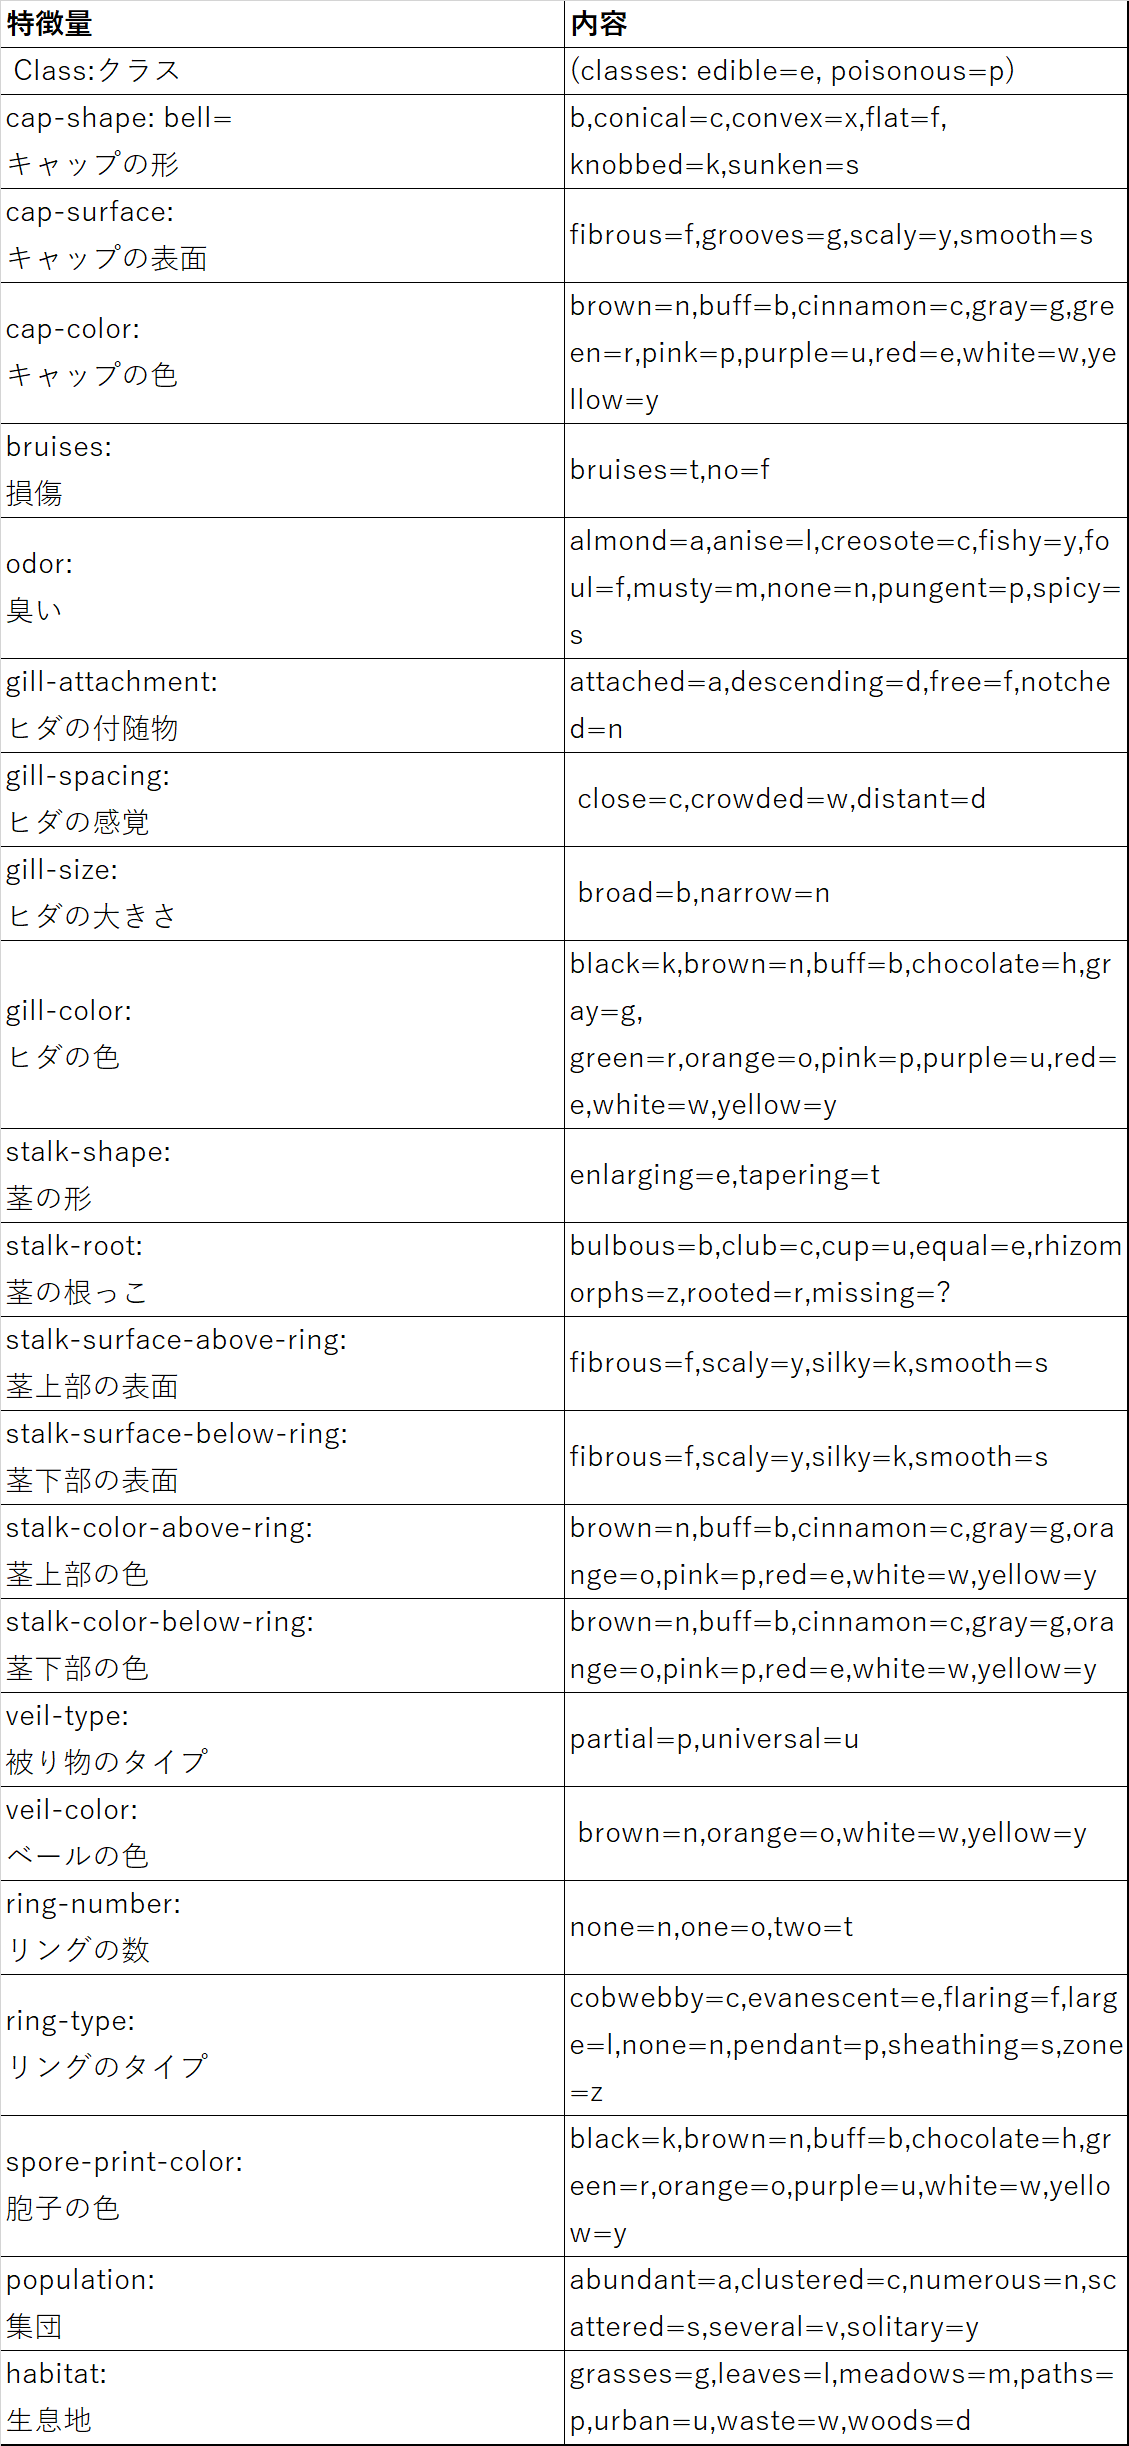

# ２　必要ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ３　基礎集計

In [2]:
df=pd.read_csv("mushrooms.csv")

In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.isnull().sum().max()#念の為最大値だけもう一度確認

0

In [8]:
#特徴量の内容を俯瞰
for feature in df.columns:
    print(feature,":",df[feature].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


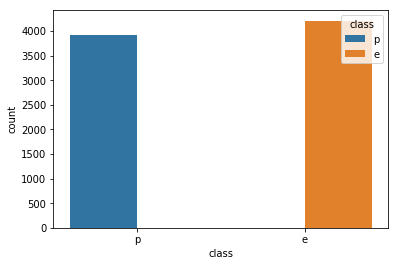

In [9]:
sns.countplot(x='class',hue='class',data=df)

fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].pie(train["Survived"].value_counts(),labels=["Deceased","Survived"] , autopct='%.1f%%' )
ax[0].set_title("Ratio of the Survived/Deceased")
sns.countplot(x='class',hue='class',data=df,ax=ax[1])
ax[1].set_title("The number of Survived/Deceased people")

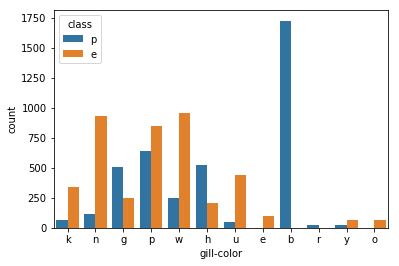

In [10]:
sns.countplot(x='gill-color',hue='class',data=df)

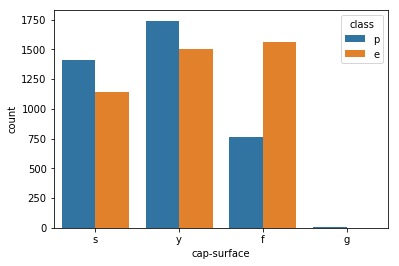

In [11]:
sns.countplot(x='cap-surface',hue='class',data=df)

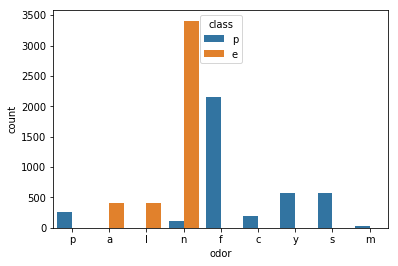

In [12]:
sns.countplot(x='odor',hue='class',data=df)

# ４　前処理

In [13]:
#とりあえずVeiltypeは1種類のみで関係なさそう
df=df.drop(["veil-type"],axis=1)

In [14]:
#stalk-rootに「？」があり。Day１ではこれに関わる行を全て消した。しかし行数を確認してみる
print(df.groupby('stalk-root').size())
#8124行の中で2500近く締めており、消さない方がいいと判断

stalk-root
?    2480
b    3776
c     556
e    1120
r     192
dtype: int64


In [15]:
df.shape
#classの食用又は毒きのこ分類問題
#２1の特徴量が存在する

(8124, 22)

In [16]:
#特徴量がカテゴリカル変数のためEncodingを行う
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [17]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [18]:
#識別するラベルデータをチェック
print(df.groupby('class').size())

class
0    4208
1    3916
dtype: int64


In [19]:
for feature in df.columns:
    print(feature, ':', df[feature].unique())

class : [1 0]
cap-shape : [5 0 4 2 3 1]
cap-surface : [2 3 0 1]
cap-color : [4 9 8 3 2 5 0 7 1 6]
bruises : [1 0]
odor : [6 0 3 5 2 1 8 7 4]
gill-attachment : [1 0]
gill-spacing : [0 1]
gill-size : [1 0]
gill-color : [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape : [0 1]
stalk-root : [3 2 1 4 0]
stalk-surface-above-ring : [2 0 1 3]
stalk-surface-below-ring : [2 0 3 1]
stalk-color-above-ring : [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring : [7 6 3 0 4 2 8 5 1]
veil-color : [2 0 1 3]
ring-number : [1 2 0]
ring-type : [4 0 2 1 3]
spore-print-color : [2 3 6 1 7 5 4 8 0]
population : [3 2 0 4 5 1]
habitat : [5 1 3 0 4 6 2]


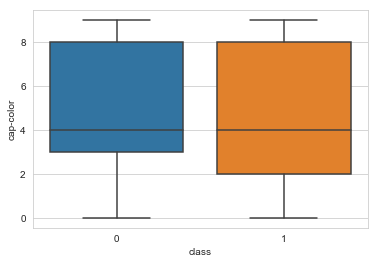

In [20]:
sns.set_style('whitegrid')
sns.boxplot( x=df['class'],y=df['cap-color'])

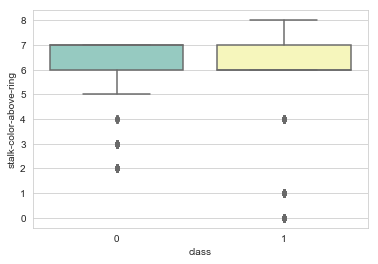

In [21]:
sns.boxplot( x='class',y='stalk-color-above-ring',data=df,palette="Set3")

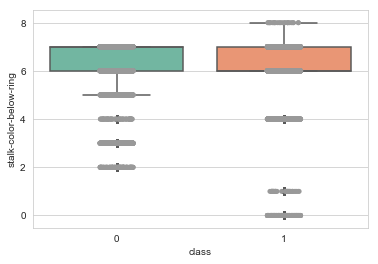

In [22]:
sns.boxplot( x='class',y='stalk-color-below-ring',data=df,palette="Set2")
sns.stripplot(x='class',y='stalk-color-below-ring',data=df,jitter=True,color=".6")

In [23]:
#各特徴量の相関係数の可視化:Day2の2－5より拝借
df.corr().style.background_gradient().format("{:.2f}")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,-0.10,-0.38,-0.33,-0.30,-0.15,-0.15,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,0.06,0.03,-0.03,-0.03,-0.03,-0.03,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,-0.01,-0.13,0.09,0.11,0.07,0.07,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,-0.46,0.32,-0.06,-0.05,0.00,0.01,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,0.10,0.24,0.46,0.46,0.08,0.09,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,0.46,-0.21,0.12,0.06,0.17,0.17,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,0.19,0.14,-0.09,-0.12,0.10,0.10,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,0.08,0.35,-0.21,-0.21,0.27,0.25,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,0.21,-0.34,0.06,0.01,0.30,0.28,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,-0.18,0.32,0.22,0.26,-0.06,-0.07,-0.10,0.10,0.63,-0.42,-0.03,-0.20


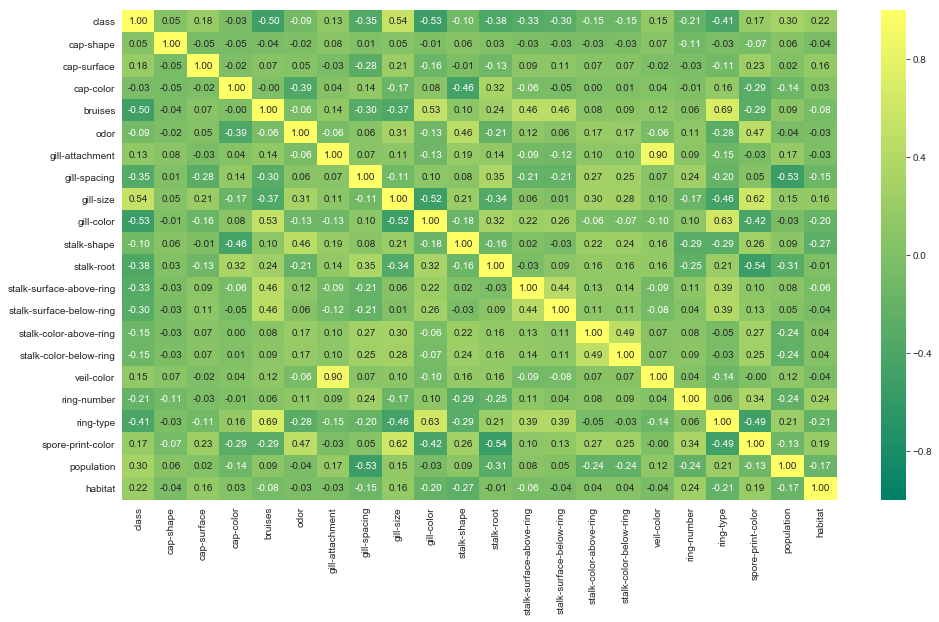

In [24]:
#せっかくだからSeabornも使いたい…Day2と違い表拡大、annot、Vmax関数の導入！
f,ax=plt.subplots(figsize=(16,9))
sns.heatmap(df.corr(),cmap="summer",annot=True,fmt='.2f',vmax=1.0,vmin=-1.0)

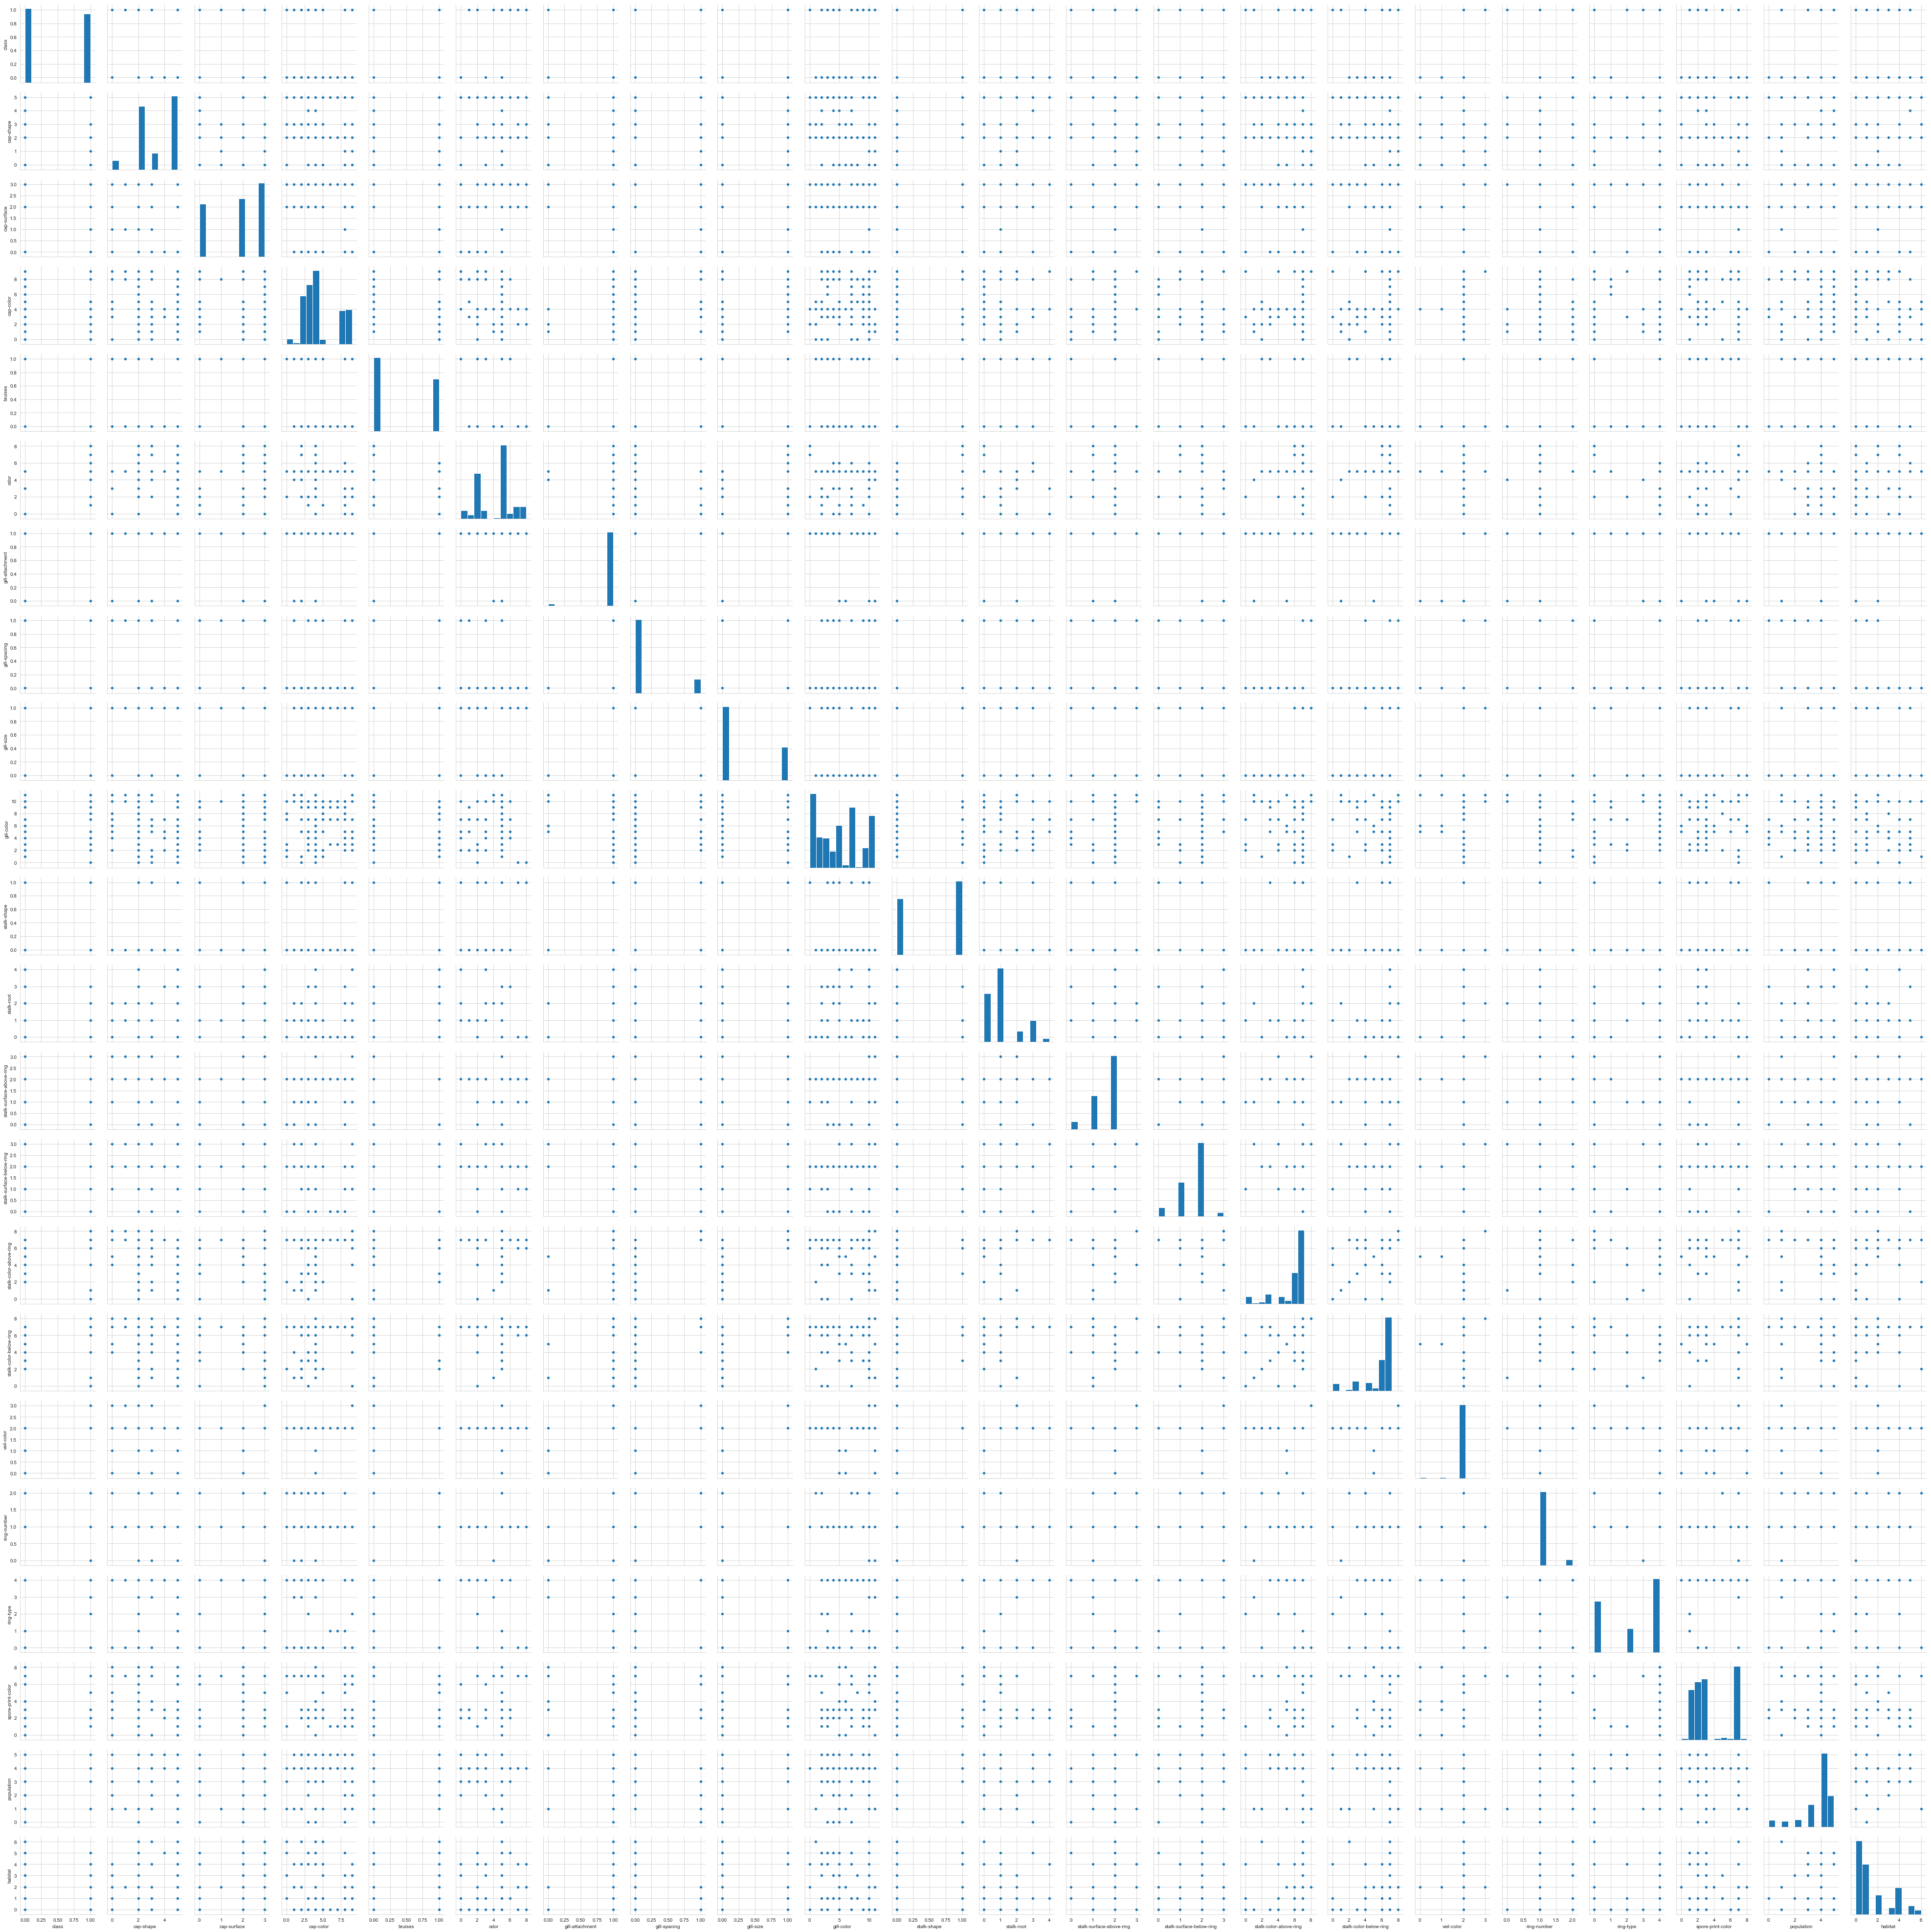

In [25]:
sns.pairplot(df)

/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


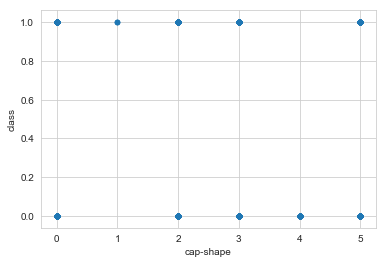

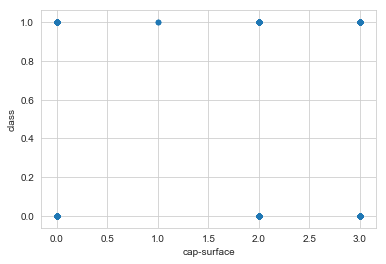

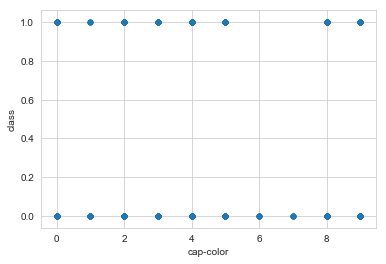

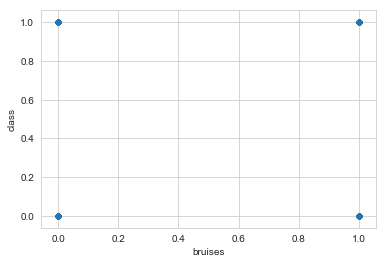

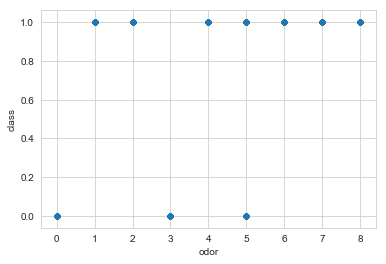

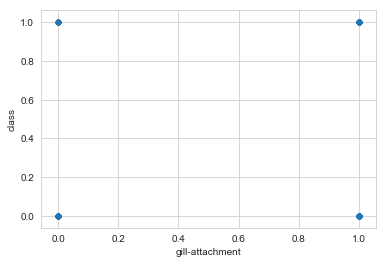

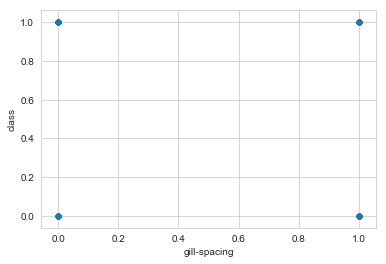

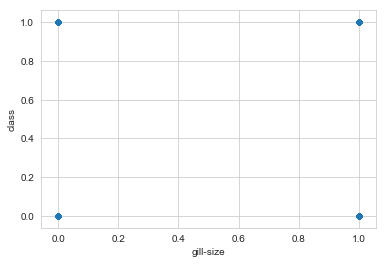

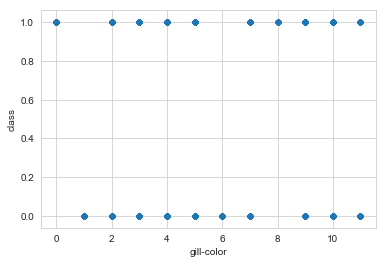

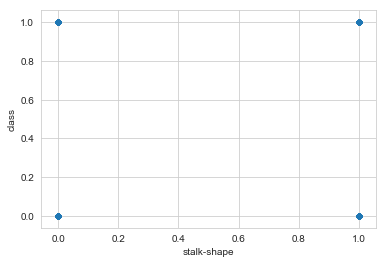

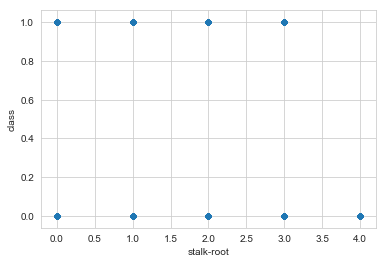

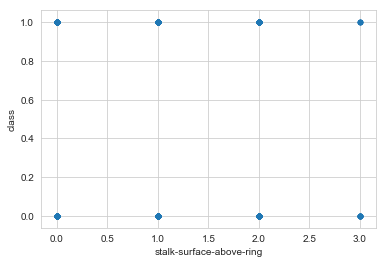

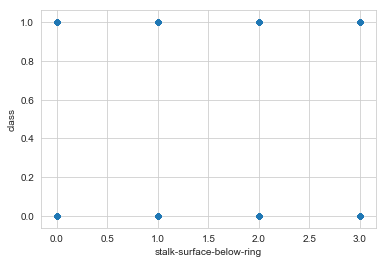

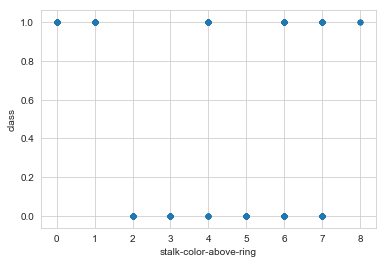

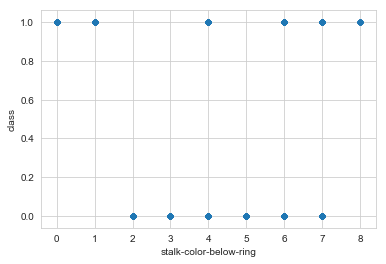

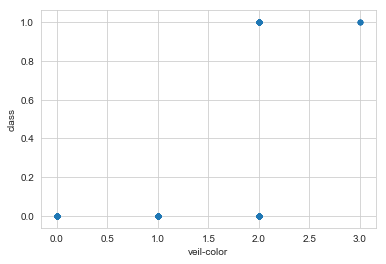

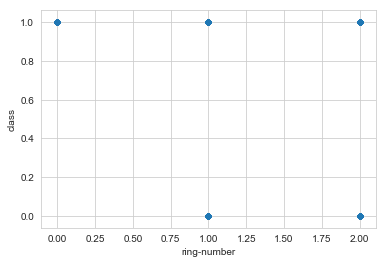

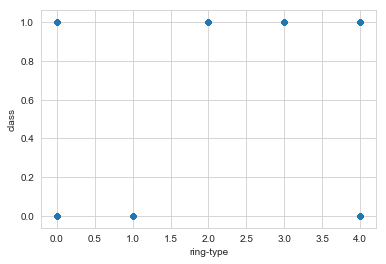

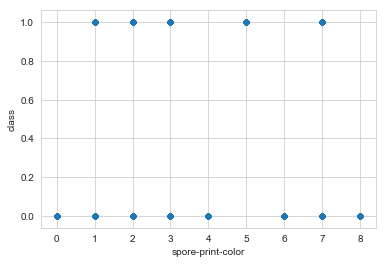

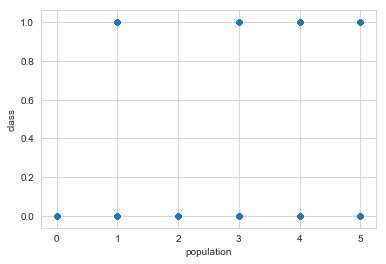

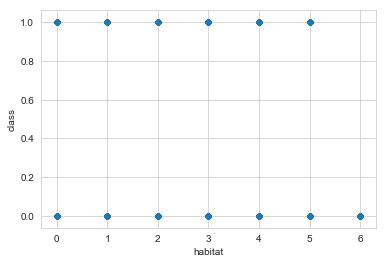

In [26]:
#今回の目的より、classとの相関のみ可視化することにする。
for c in df.columns:
    if (c != 'class') & (c != 'date'):
        df[[c,'class']].plot(kind='scatter',x=c,y='class')

# ５　データ分割

In [27]:
y = df['class']
df1 = df
df1.drop('class',axis=1,inplace=True)

In [28]:
X=df1
X.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1


In [29]:
#交差検証及びグリッドサーチの呼び出し
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
#random_stateの1234はよくわかってないが、データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

# ６　学習と評価

６－１　ロジスティック回帰の利用

In [31]:
#ロジスティック回帰での検証＋Day3過学習の判定追加
from sklearn.linear_model import LogisticRegression

#ロジスティック回帰の定義
#ハイパーパラメータCがわからないがカーネル参照にグリッドサーチを入れてみる（C＝1/λでL2ノルムらしい）→あまり影響がない
#交差検証は5回
param_grid = {'C':[0.1,1,10,20,50,100,500,1000]}
cv = GridSearchCV(LogisticRegression(), param_grid=param_grid,cv=5)
model=cv.fit(X_train,y_train)
print("Trainスコア:",model.score(X_train,y_train))
print("Testスコア:",model.score(X_test,y_test))
print("過学習なし")

/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trainスコア: 0.9616331555190808
Testスコア: 0.9584615384615385
過学習なし


In [32]:
#ベストパラメータのモデルの出力
cv.best_params_

{'C': 500}

In [33]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [34]:
print(classification_report(y_test,cv.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1680
           1       0.96      0.96      0.96      1570

   micro avg       0.96      0.96      0.96      3250
   macro avg       0.96      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250



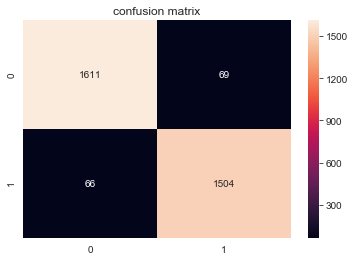

In [35]:
cmx = confusion_matrix(y_test,cv.best_estimator_.predict(X_test))
sns.heatmap(cmx,annot=True,fmt='d')
plt.title("confusion matrix")
plt.show()

６－２　ランダムフォレストの利用

In [36]:
#ランダムフォレストでの検証
from sklearn.ensemble import RandomForestClassifier

#予測器の数と決定木の深さ（ハイパーパラメータ）をグリッドサーチで試行してみる
param_grid = {'n_estimators':[3,5,7,10,20],'max_depth':[1,2,3,5,7,9]}
cv2 = GridSearchCV(RandomForestClassifier(criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234),param_grid=param_grid,cv=5)
model2=cv2.fit(X_train,y_train)

print("Trainスコア:",model2.score(X_train,y_train))
print("Testスコア:",model2.score(X_test,y_test))
print("過学習なし")

Trainスコア: 1.0
Testスコア: 1.0
過学習なし


In [37]:
cv2.best_params_

{'max_depth': 9, 'n_estimators': 10}

In [38]:
print(classification_report(y_test,cv2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1570

   micro avg       1.00      1.00      1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



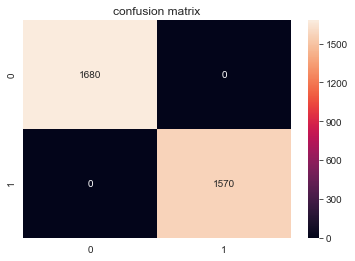

In [39]:
cmx = confusion_matrix(y_test,cv2.best_estimator_.predict(X_test))
sns.heatmap(cmx,annot=True,fmt='d')
plt.title("confusion matrix")
plt.show()

６－３　アダブーストの利用

In [40]:
#アダブースト_グリッドサーチはできなかった
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
#param_grid = {'n_estimators':[3,5,7,10,20],'max_depth':[1,2,3,5,7,9]}
#cv3 = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=4,min_samples_split=2,random_state=1234,criterion="gini"),param_grid=param_grid,cv=5))

cv3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                                                                 min_samples_leaf=4,
                                                                                 min_samples_split=2, 
                                                                                 random_state=1234,
                                                                                 criterion="gini"),
                                           n_estimators=10, random_state=1234)

model3=cv3.fit(X_train,y_train)
print("Trainスコア:",model3.score(X_train,y_train))
print("Testスコア:",model3.score(X_test,y_test))
print("過学習なし")

Trainスコア: 1.0
Testスコア: 1.0
過学習なし


In [42]:
print(classification_report(y_test,cv3.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1570

   micro avg       1.00      1.00      1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



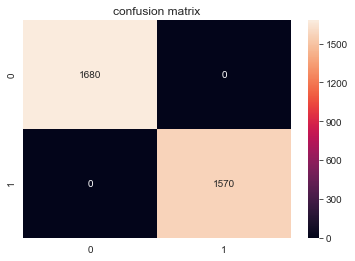

In [43]:
cmx = confusion_matrix(y_test,cv3.predict(X_test))
sns.heatmap(cmx,annot=True,fmt='d')
plt.title("confusion matrix")
plt.show()

６－４　SVMの利用

In [44]:
from sklearn.svm import SVC#ここだけ新しいサポートベクタークラシファイア

In [45]:
param_grid = {'kernel':['linear', 'rbf'],'C':[0.1,1,10,20,50,100]}
cv4 = GridSearchCV(SVC(), param_grid=param_grid,cv=5)

model4=cv4.fit(X_train,y_train) 
print("Trainスコア:",model4.score(X_train,y_train))
print("Testスコア:",model4.score(X_test,y_test))
print("過学習なし")

/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sanonatsuki/anaconda3/lib/pyth

/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sanonatsuki/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sanonatsuki/anaconda3/lib/pyth

Trainスコア: 1.0
Testスコア: 1.0
過学習なし


In [46]:
model4.best_params_

{'C': 10, 'kernel': 'rbf'}

In [47]:
print(classification_report(y_test,cv4.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1570

   micro avg       1.00      1.00      1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



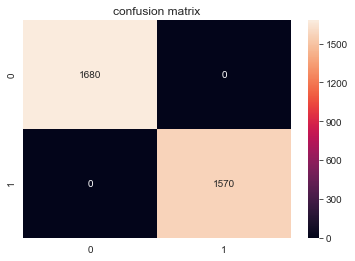

In [48]:
cmx = confusion_matrix(y_test,cv4.best_estimator_.predict(X_test))
sns.heatmap(cmx,annot=True,fmt='d')
plt.title("confusion matrix")
plt.show()

# ７　アルゴリズム別スコアのまとめ

In [49]:
result={"ロジスティック回帰":model.score(X_test,y_test),"ランダムフォレスト":model2.score(X_test,y_test),"アダブースト":model3.score(X_test,y_test),"SVM":model4.score(X_test,y_test)}
print("====All score====")
for i,j in enumerate(result):
    print(i,j)
print(result)
print("=================")

====All score====
0 ロジスティック回帰
1 ランダムフォレスト
2 アダブースト
3 SVM
{'ロジスティック回帰': 0.9584615384615385, 'ランダムフォレスト': 1.0, 'アダブースト': 1.0, 'SVM': 1.0}


# ８　DNNの利用：隠れ層１つのみ

### 数式の定義

In [50]:
def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return np.where( x > 0, 1, 0)

In [51]:
def least_square(d, y):
    return np.sum(np.square(d - y)) / 2

def d_least_square(d, y):
    return y - d

In [52]:
# 出力層の活性化関数
# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [53]:
# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

In [54]:
# ソフトマックスとクロスエントロピーの複合導関数
def d_softmax_with_loss(d, y):
    batch_size = d.shape[0]
    if d.size == y.size: # 教師データがone-hot-vectorの場合
        dx = (y - d) / batch_size
    else:
        dx = y.copy()
        dx[np.arange(batch_size), d] -= 1
        dx = dx / batch_size
    return dx

In [55]:
X.shape

(8124, 21)

### 各レイヤーの定義、SGD、正則化、学習と評価

In [56]:
x_vals = np.array(X)
y_vals = np.array(y)

x_train, x_test, d_train, d_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=0,)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01 
#入力層サイズ
input_layer_size = 100 
#中間層サイズ
hidden_layer_size = 21
#出力層サイズ
output_layer_size = 2 
# 繰り返し数
iters_num = 1000 
# ミニバッチサイズ
batch_size = 100 # 
# 学習率
learning_rate = 0.1 
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    #network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_size)
    #network['W2'] = wieght_init * np.random.randn(hidden_layer_size, output_layer_size)
    # Xavierの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
    network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
    # Heの初期値
    # network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    # network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)

    network['b1'] = np.zeros(hidden_layer_size)
    network['b2'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2  = network['b1'], network['b2']
        
    u1 =  np.dot(x, W1) + b1
    z1 = relu(u1)
    u2 =  np.dot(z1, W2) + b2
    y = softmax(u2)
 
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']    
    # 出力層でのデルタ
    delta2 = d_softmax_with_loss(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()


accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print(' Test : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("正答率")
# グラフの表示
plt.show()

データ読み込み完了


ValueError: shapes (100,21) and (100,21) not aligned: 21 (dim 1) != 100 (dim 0)

# ９反省



### 全体の感想
キノコ分類は前処理が比較的すくないところから、何回点も回せて様々なアルゴリズムを試行することができた。
プログラミング自体が初学者であるためPythonでの実装には苦労した。しかし、苦労したぶんだけ自力で検索するくせや、書籍を興味を持って読むことになった。
一方、実装を最重要視しただけに数式の理解には多くの課題がのこる。また、機械学習以外のGitの使い方などで詰まる部分がたたあった。
今後は下記反省点を改善していきたい。


###  自己評価点
- 全体:課題を何回も回せることで機械学習全体のフローを理解できた（キノコ分類問題の良かった点）
- Coding：Pythonのコーディング力が、ぱいそん？→格段に向上
- アルゴリズム：ロジスティック回帰、SVM、ディープラーニングなど様々なアルゴリズムを試せた
- 自力検索スキルUp：書籍、Qiita、職業エンジニアに聞くなど検索力がついた

###  今後の改善点
- 前処理：前処理の体験が比較的すくない（キノコ分類の悪い点）
- 数学：コードを打つのに注力し数式理解が後手になっていた
- Coding：一つ一つコード理解、シンプルさ、可読性
- アルゴリズム：ベイズ推論挑戦してみたが時間足らずで断念
- その他：コマンドプロンプト、Githubの使い方がいまいち、Markdown記法、基本的な知識